Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:

library("tidymodels")


── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.12     ✔ recipes      1.3.1 
✔ dials        1.4.2      ✔ rsample      1.3.1 
✔ dplyr        1.1.4      ✔ tailor       0.1.0 
✔ ggplot2      4.0.1      ✔ tidyr        1.3.2 
✔ infer        1.1.0      ✔ tune         2.0.1 
✔ modeldata    1.5.1      ✔ workflows    1.3.0 
✔ parsnip      1.4.1      ✔ workflowsets 1.1.1 
✔ purrr        1.2.1      ✔ yardstick    1.3.2 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [9]:

head(diabetes_train)
table(diabetes_train$Outcome)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,0
1,89,66,23,94,28.1,0.167,21,0
5,116,74,0,0,25.6,0.201,30,0
10,115,0,0,0,35.3,0.134,29,0
4,110,92,0,0,37.6,0.191,30,0
10,139,80,0,0,27.1,1.441,57,0



  0   1 
375 201 

❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The $Outcome variable is the most suitable for a logistic regression as it is binary which is what needed for classification

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BMI         |Body mass index (weight in kg/(height in m)^2)|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

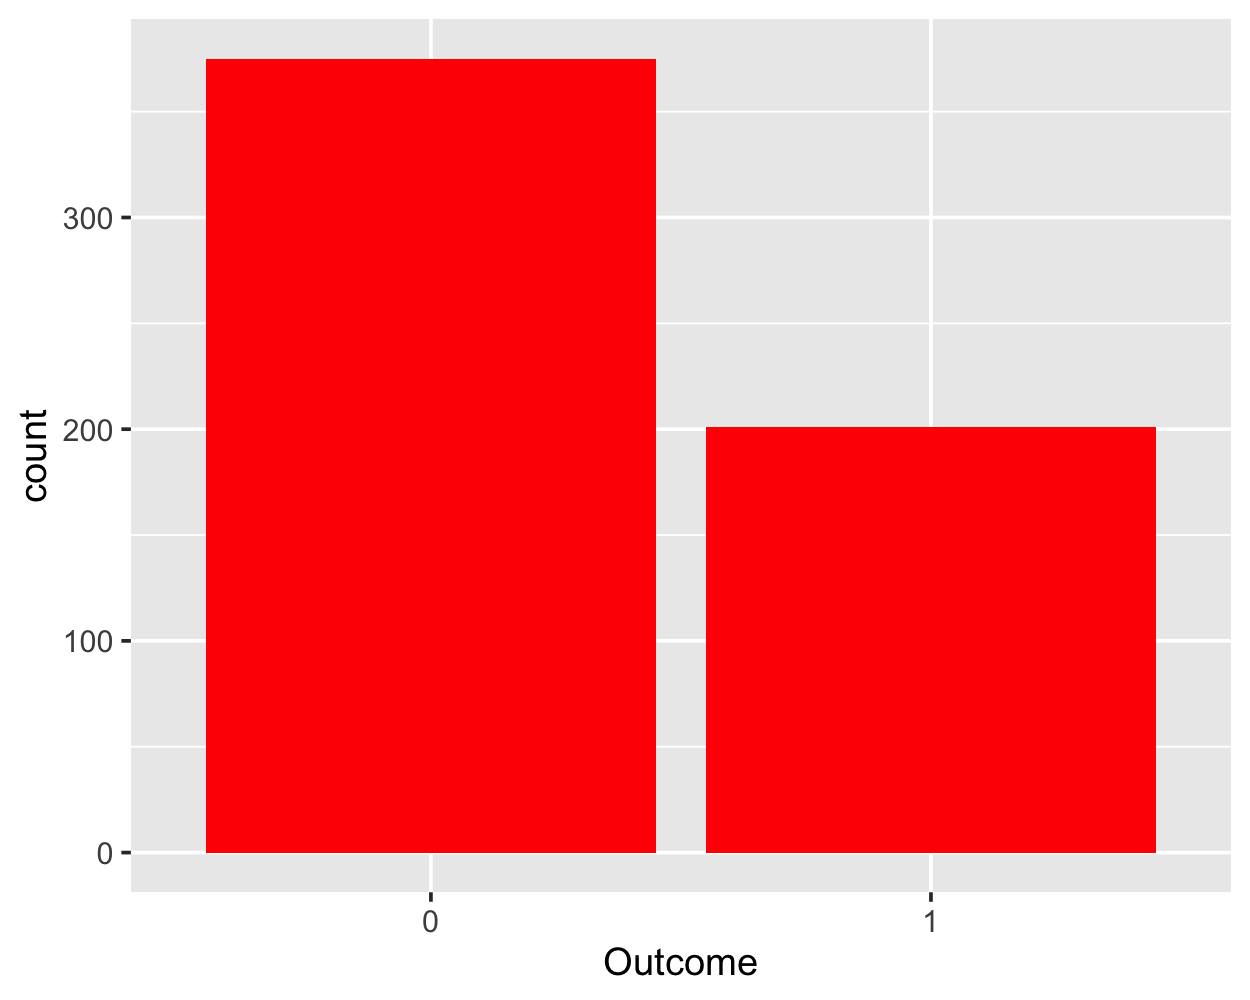

In [11]:
ggplot(diabetes_train, aes(x=Outcome)) +
geom_bar(fill="red")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

It does not look they are balanced. I checked the actual numbers above with the table() command and we have 375 no diabetes and 201 diabetes.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [12]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

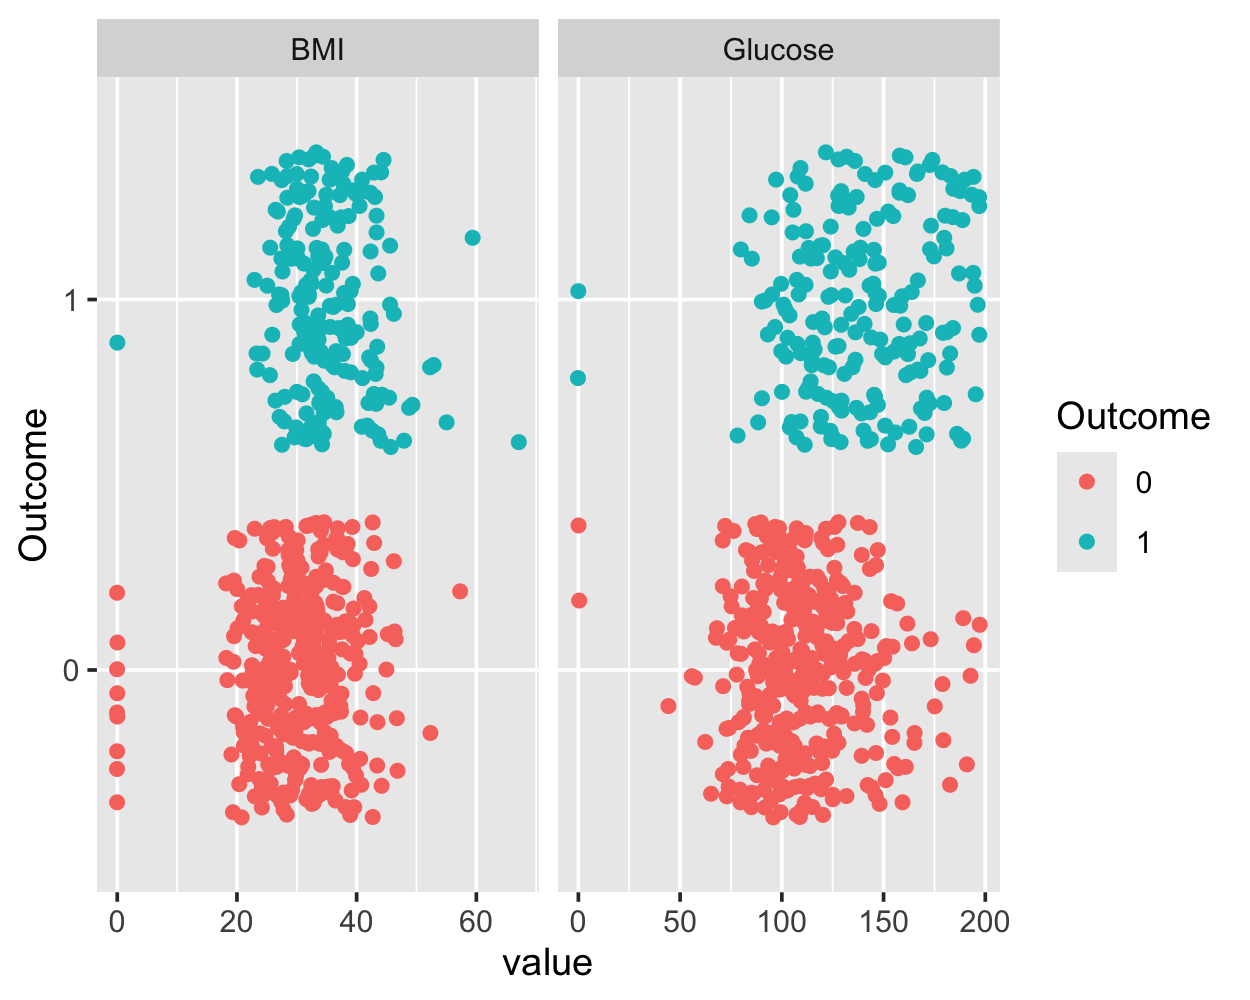

In [17]:
ggplot(plot_df, aes(x=value,y=Outcome,color=Outcome))+
geom_jitter()+
facet_wrap(~name,ncol=2,scales='free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

It looks like it allows each plot to use the its own most appropraite x scale axis range to visualize the data 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [24]:

mod_fit = logistic_reg() |> set_engine("glm")|> fit(Outcome ~ BMI + Glucose, data = diabetes_train
)
mod_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.41063      0.08729      0.03200  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 587 	AIC: 593

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [25]:
diabetes_test_wPred = augment(mod_fit,new_data = diabetes_test)
head(diabetes_test_wPred)


.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.96803188,0.03196812,8,125,96,0,0,0.0,0.232,54,1
1,0.22010404,0.77989596,1,189,60,23,846,30.1,0.398,59,1
1,0.41011100,0.58988900,0,118,84,47,230,45.8,0.551,31,1
0,0.58291218,0.41708782,1,103,30,38,83,43.3,0.183,33,0
0,0.75994193,0.24005807,8,99,84,0,0,35.4,0.388,50,0
1,0.08820012,0.91179988,7,196,90,0,0,39.8,0.451,41,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [26]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 107  25
         1  18  42

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

People who actually had diabetes: 25 + 42 = 67
Of those 67, correctly predicted: 42
People predicted to have diabetes who didn’t: 18
